In [93]:
from ipywidgets import interact

from sympy import *
from sympy.plotting.plot import plot3d

In [116]:
P, m, k, n = symbols("P m k n", real=True)

P_false_positive = (1 - (1 - 1/m)**(k*n))**k

Eq(P, P_false_positive)

Eq(P, (1 - (1 - 1/m)**(k*n))**k)

In [126]:
m_P = simplify(solve(Eq(P, P_false_positive), m)[0])
Eq(m, m_P)

Eq(m, -1/((1 - P**(1/k))**(1/(k*n)) - 1))

In [222]:
plot(m_P.subs([(P, 0.5), (k, 1))]), (n, 10, 200))

SyntaxError: closing parenthesis ')' does not match opening parenthesis '[' (2421789473.py, line 1)

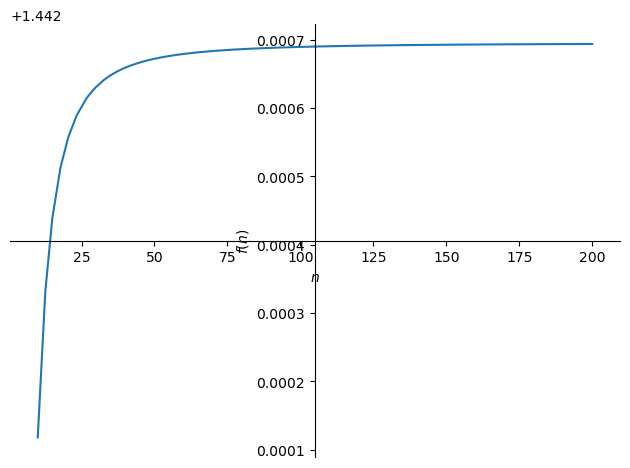

-(1 - P**(1/k))**(1/(k*n))*log(1 - P**(1/k))/(k*n**2*((1 - P**(1/k))**(1/(k*n)) - 1)**2)

In [220]:
plot(diff(m_P, n).subs([(P, 0.5), (k, 1)]), (n, 10, 200))
diff(m_P, n)

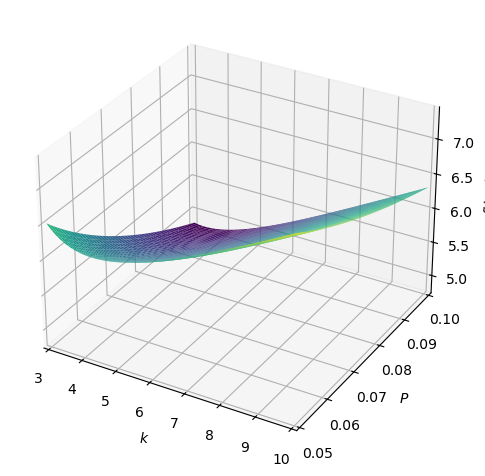

In [165]:
plot3d(limit(diff(m_P, n), n, oo), (k, 3, 10), (P, 0.05, 0.1))

In [193]:
x = diff(diff(diff(m_P, n), k), P)
limit(x, n, oo).subs([(k, 3), (P, 0.1)])

5.18359425992622

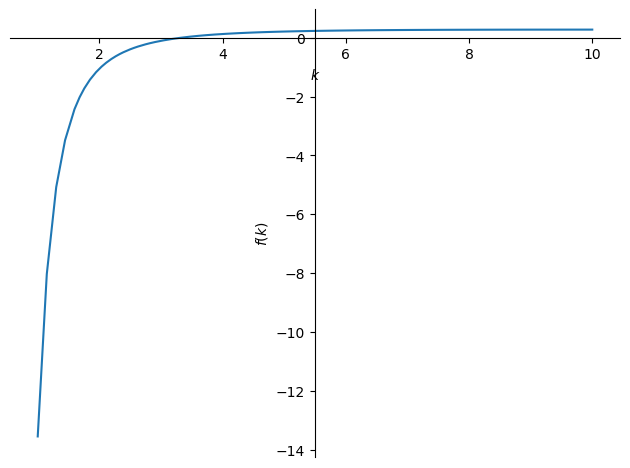

In [186]:
plot(x.subs(P, 0.1), (k, 1, 10))

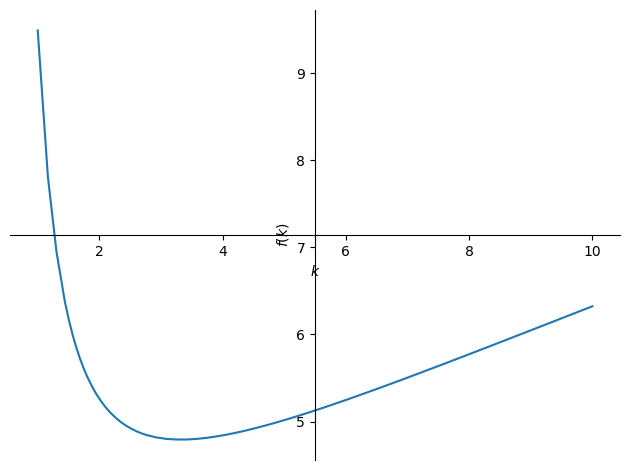

In [169]:
plot(limit(diff(m_P, n), n, oo).subs(P, 0.1), (k, 1, 10))

In [39]:
alpha = symbols("alpha", real=True)

P_in_terms_of_alpha = P_false_positive.subs([(n, alpha * m)])
Eq(P, P_in_terms_of_alpha)

Eq(P, (1 - (1 - 1/m)**(alpha*k*m))**k)

In [38]:
alpha_eq = solve(Eq(P, P_in_terms_of_alpha), alpha)[0]
Eq(alpha, alpha_eq)

Eq(alpha, log(1 - P**(1/k))/(k*m*log((m - 1)/m)))

In [3]:
mPrime = symbols("m'", real=True)
parent_eq = Eq(P_false_positive, P_false_positive.subs([(n, 2*n), (m, mPrime)]))
parent_eq

Eq((1 - (1 - 1/m)**(k*n))**k, (1 - (1 - 1/m')**(2*k*n))**k)

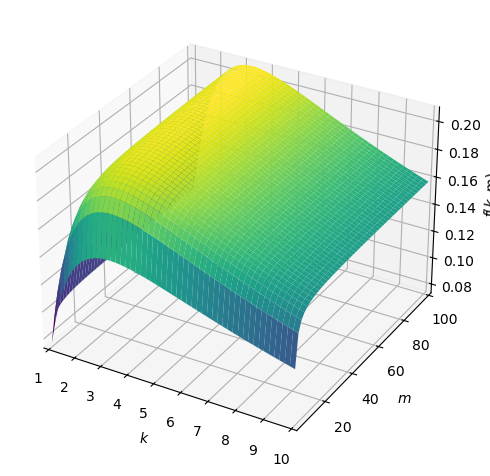

log(1 - 0.1**(1/k))/(k*m*log((m - 1)/m))

In [36]:
alpha_at_P = alpha_eq.subs(P, 0.1)
plot3d(alpha_at_P, (k, 1, 10), (m, 2, 100), show = True)
alpha_at_P

In [113]:
Eq(0, simplify(diff(P_in_terms_of_alpha, k)))

Eq(0, (1 - ((m - 1)/m)**(alpha*k*m))**(k - 1)*(-alpha*k*m*((m - 1)/m)**(alpha*k*m)*log((m - 1)/m) - (((m - 1)/m)**(alpha*k*m) - 1)*log(1 - ((m - 1)/m)**(alpha*k*m))))

In [110]:
@interact(P_v=(1, 100))
def d_alpha(P_v):
    d_k_alpha = simplify(diff(alpha_eq, k))
    
    
    plot3d(d_k_alpha.subs([(P, P_v / 10000)]), (k, 1, 10), (m, 10, 1000))
    
    d_k_alpha

interactive(children=(IntSlider(value=50, description='P_v', min=1), Output()), _dom_classes=('widget-interact…

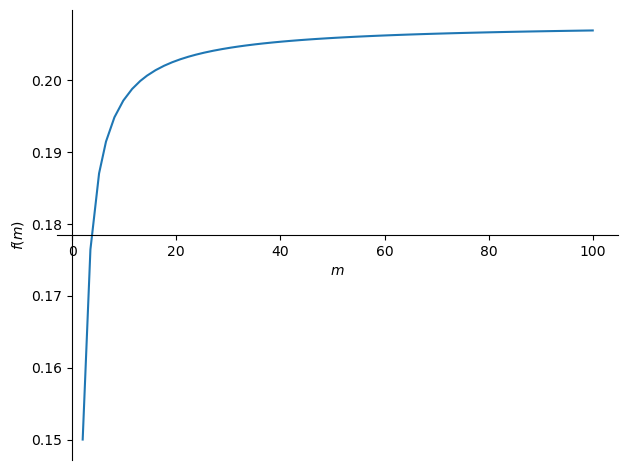

In [6]:
plot(alpha_eq.subs([(P, 0.1), (k, 3)]), (m, 2, 100))

In [7]:
alpha_eval = N(limit(alpha_eq.subs([(P, 0.1), (k, 3)]), m, oo))
alpha_eval

0.207972528678385

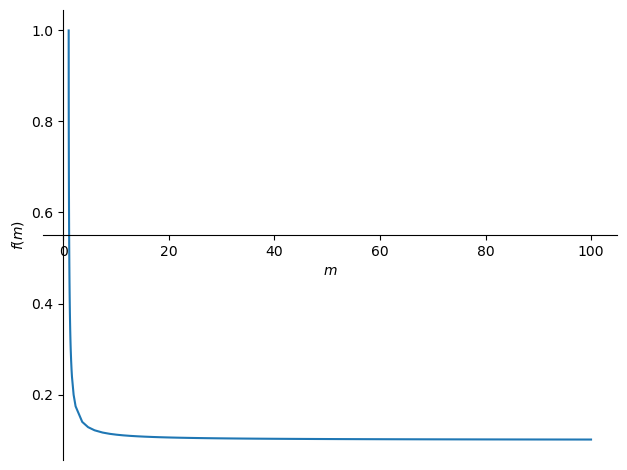

In [8]:
plot(P_false_positive.subs([(k, 3), (n, alpha_eval * m)]), (m, 1, 100))

In [17]:
parent_eq_2 = parent_eq.subs(n, alpha * m)

In [18]:
sol = solve(parent_eq_2, mPrime)[0]
sol

-1/((-sqrt(1 - ((1 - ((m - 1)/m)**(alpha*k*m))**k)**(1/k)))**(1/(alpha*k*m)) - 1)

In [35]:
N(sol.subs([(k, 3), (m, 100), (alpha, 0.1)]))

0.957606577879844 + 9.51862937706735*I

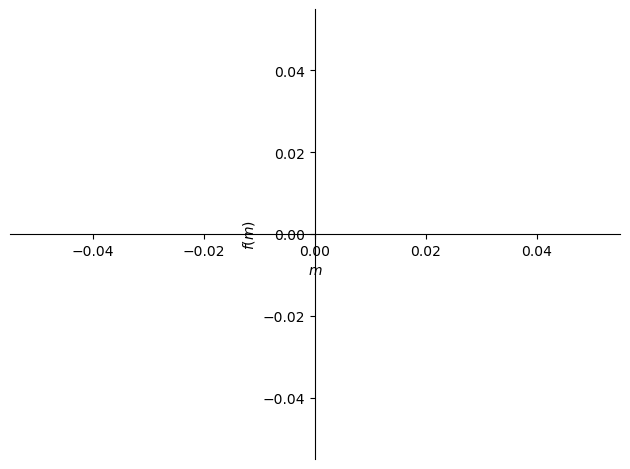

In [24]:
plot(sol.subs([(k, 3), (alpha, alpha_eval)]), (m, 2, 100))

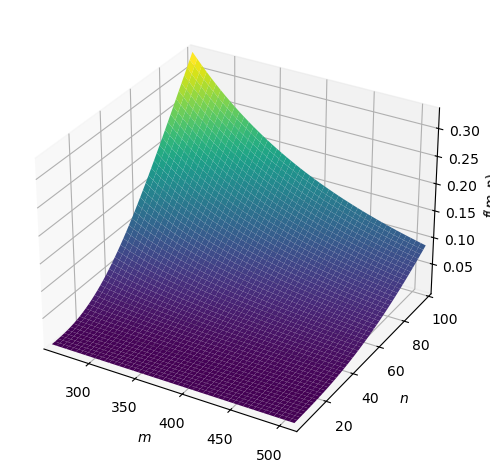

In [11]:
plot3d(P_false_positive.subs([(k, 3)]), (m, 256, 512), (n, 1, 100))

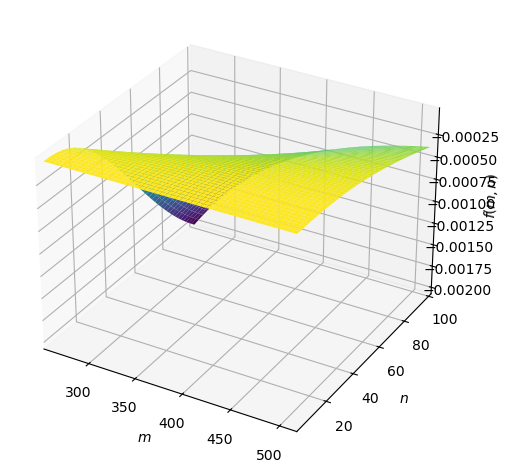

In [12]:
plot3d(simplify(diff(P_false_positive, m)).subs([(k, 3)]), (m, 256, 512), (n, 1, 100))